In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer, scale, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
# from sklearn.metrics import roc_auc_score, accuracy_score

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Configure visualizations
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
plt.rcParams['figure.figsize'] = 8, 6

In [2]:
def describe_more(df):
    var = []
    l = []
    t = []
    for x in df:
        var.append(x)
        l.append(len(pd.value_counts(df[x])))
        t.append(df[x].dtypes)
    levels = pd.DataFrame({'Variable': var, 'Levels': l, 'Datatype': t})
    levels.sort_values(by='Levels', inplace=True)
    return levels


def plot_correlation_map(df):
    corr = df.corr()
    _, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    _ = sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={'shrink': 0.9},
                    ax=ax, annot=True, annot_kws={'fontsize': 12})


def plot_categories(df, cat, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()


def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()


def plot_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(16, 12))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(bins=10, ax=ax)
        ax.set_title('Skew: ' + str(round(float(df[var_name].skew()),)))
        ax.set_xticklabels([], visible=False)
        ax.set_yticklabels([], visible=False)
    
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


# def plot_model_var_imp(model, X, y):
#     imp = pd.DataFrame(model.feature_importances_, columns=['Importance'], index=X.columns)
#     imp = imp.sort_values(['Importance'], ascending = True)
#     imp[:10].plot(kind = 'barh')
#     print(model.score(X ,y))

In [3]:
# get titanic & test csv files as a DataFrame
train = pd.read_csv('../Kaggle_Titanic/data/train.csv')
test = pd.read_csv('../Kaggle_Titanic/data/test.csv')

train_len = train.shape[0]
full = train.append(test, ignore_index=True)
titanic = full[ :train_len]

del train, test

titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


In [5]:
describe_more(titanic)

,Datatype,Levels,Variable
8,object,2,Sex
10,float64,2,Survived
2,object,3,Embarked
7,int64,3,Pclass
5,int64,7,Parch
9,int64,7,SibSp
0,float64,88,Age
1,object,147,Cabin
3,float64,248,Fare
11,object,681,Ticket


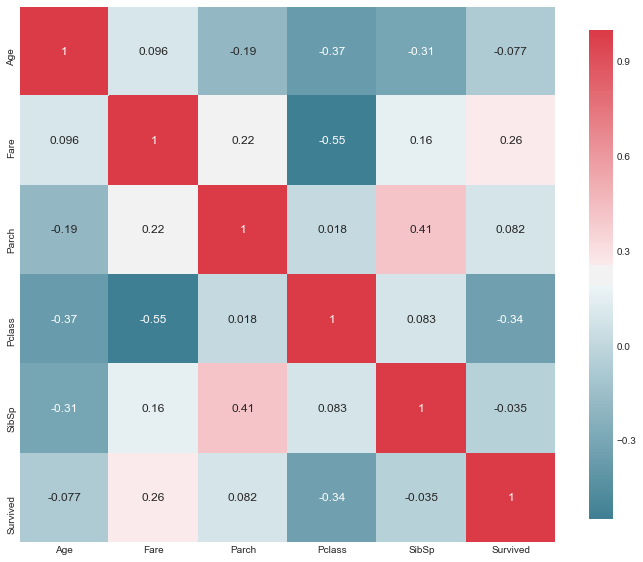

In [6]:
plot_correlation_map(titanic.drop('PassengerId', axis=1))

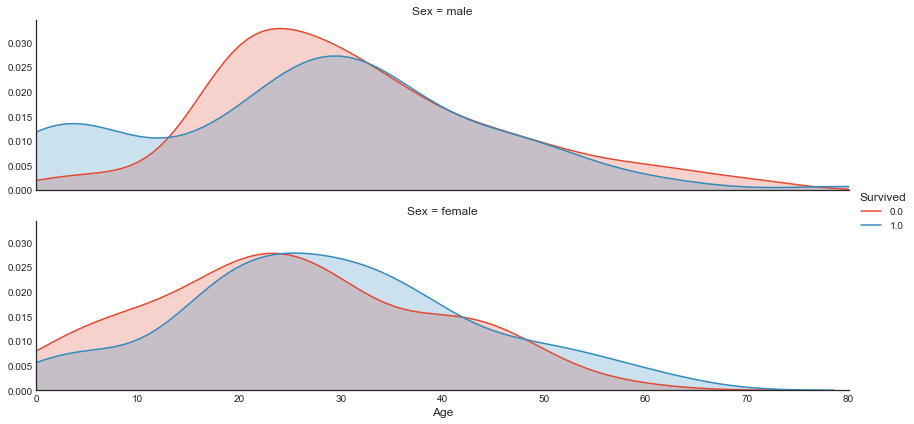

In [7]:
plot_distribution(titanic, var='Age', target='Survived', row='Sex')

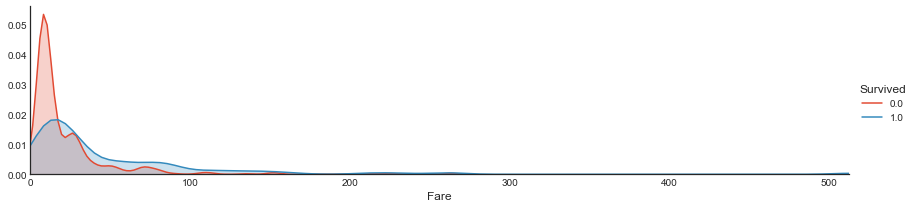

In [8]:
plot_distribution(titanic, var='Fare', target='Survived')

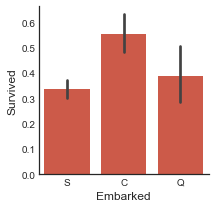

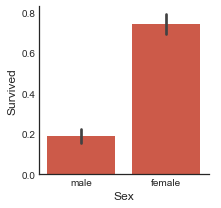

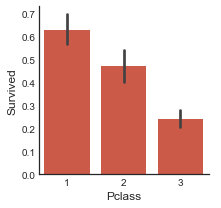

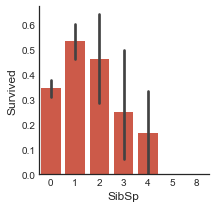

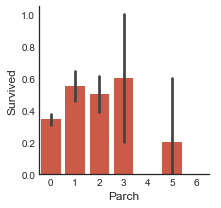

In [9]:
plot_categories(titanic, cat='Embarked', target='Survived')
plot_categories(titanic, cat='Sex', target='Survived')
plot_categories(titanic, cat='Pclass', target='Survived')
plot_categories(titanic, cat='SibSp', target='Survived')
plot_categories(titanic, cat='Parch', target='Survived')

In [10]:
# find NaN and return column name
print(titanic.isnull().any())
print(full[train_len:].isnull().any())

Index(['Age', 'Cabin', 'Embarked'], dtype='object')
Index(['Age', 'Cabin', 'Fare', 'Survived'], dtype='object')


In [11]:
titanic = titanic.drop(['PassengerId', 'Ticket', 'Name'], axis=1)

titanic.head(3)

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,NaN,S,7.2500,0,3,male,1,0.0
1,38.0,C85,C,71.2833,0,1,female,1,1.0
2,26.0,NaN,S,7.9250,0,3,female,0,1.0


In [12]:
titanic_no_cabin = titanic.drop('Cabin', axis=1)
titanic_no_cabin.head(3)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0.0
1,38.0,C,71.2833,0,1,female,1,1.0
2,26.0,S,7.9250,0,3,female,0,1.0


In [43]:
labelTranformer = {'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}
titanic_no_cabin = titanic_no_cabin.replace(labelTranformer)
titanic_no_cabin.head(3)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,0.0,7.2500,0,3,0,1,0.0
1,38.0,1.0,71.2833,0,1,1,1,1.0
2,26.0,0.0,7.9250,0,3,1,0,1.0


In [44]:
titanic_no_cabin.describe()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
count,714.000000,889.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.362205,32.204208,0.381594,2.308642,0.352413,0.523008,0.383838
std,14.526497,0.636157,49.693429,0.806057,0.836071,0.477990,1.102743,0.486592
min,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,7.910400,0.000000,2.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,14.454200,0.000000,3.000000,0.000000,0.000000,0.000000
75%,38.000000,1.000000,31.000000,0.000000,3.000000,1.000000,1.000000,1.000000
max,80.000000,2.000000,512.329200,6.000000,3.000000,1.000000,8.000000,1.000000


In [49]:
titanic_no_cabin.isnull().any(axis=0)

Age          True
Embarked     True
Fare        False
Parch       False
Pclass      False
Sex         False
SibSp       False
Survived    False
dtype: bool

In [51]:
naVal = {'Age': 26.7, 'Embarked': 0}
titanic_no_cabin.fillna(value=naVal, inplace=True)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,0.0,7.2500,0,3,0,1,0.0
1,38.0,1.0,71.2833,0,1,1,1,1.0
2,26.0,0.0,7.9250,0,3,1,0,1.0
3,35.0,0.0,53.1000,0,1,1,1,1.0
4,35.0,0.0,8.0500,0,3,0,0,0.0
5,26.7,2.0,8.4583,0,3,0,0,0.0
6,54.0,0.0,51.8625,0,1,0,0,0.0
7,2.0,0.0,21.0750,1,3,0,3,0.0
8,27.0,0.0,11.1333,2,3,1,0,1.0
9,14.0,1.0,30.0708,0,2,1,1,1.0


In [52]:
titanic_no_cabin.isnull().any(axis=0)

Age         False
Embarked    False
Fare        False
Parch       False
Pclass      False
Sex         False
SibSp       False
Survived    False
dtype: bool

In [53]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
titanic_no_cabin[['Age', 'Fare']] = scaler.fit_transform(titanic_no_cabin[['Age', 'Fare']])

In [56]:
titanic_no_cabin.head(3)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,-0.544329,0.0,-0.502445,0,3,0,1,0.0
1,0.681753,1.0,0.786845,0,1,1,1,1.0
2,-0.237809,0.0,-0.488854,0,3,1,0,1.0
